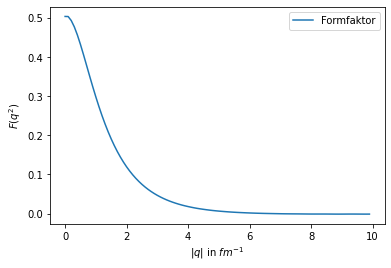

In [1]:
import numpy as np 
from numpy.polynomial.legendre import leggauss
from scipy.special import sph_harm
from scipy.interpolate import interp1d
import pylab as plt
import sys
import pandas as pd
import math as m


def formfaktor(q,l,lz,wf,pgrid,weights):
        mred=938.92/2
        hbarc=197.327
        e0=-2.225/hbarc
        neigv=1  
        formfaktor=0
        x_grid=150
        for i in range(60):#here we perform thep integral
            x_integral=0
            for j in range(x_grid):#here we perform the angular integral
                x=-1+2*j/(x_grid-1)
                delta_x=1/(x_grid-1)#we use basic integration for the angular integral
                #determine different components of p
                px=pgrid[i]*np.sqrt(1-x*x)
                pz=pgrid[i]*x
                p_angle=np.arccos(pz/pgrid[i])
                #determine the mixterm with q
                mixterm_absolut=np.sqrt(px**2+(pz-0.5*q)**2)
                mixterm_angle=np.arccos((pz-0.5*q)/mixterm_absolut)
                #spherical harmonics
                spherical_p=sph_harm(l, lz, p_angle, 0).real
                spherical_mixedterm=sph_harm(l, lz, mixterm_angle, 0).real
                wf_p=wf[i]
                for k in range(60):#look for the term after and before the mixterm. So we can interpolate
                    if(pgrid[k]>mixterm_absolut):
                        difference=pgrid[k]-mixterm_absolut
                        percent_difference=1-difference/(pgrid[k]-pgrid[k-1])#look to what the mixterm is closer
                        #print(percent_difference,i,j,q)
                        wf_mixterm=wf[k-1]+percent_difference*(wf[k]-wf[k-1])#calculate the mixterm
                        break
                        
                
                x_integral+=wf_p*wf_mixterm*spherical_p*spherical_mixedterm*delta_x#perform x integral
            formfaktor+=2*np.pi*pgrid[i]**2*x_integral*weights[i]#perform p integral
        return formfaktor
        
        
#Problem 4
filein=open("wf-obe-lam=1200.00.dat", "r")
pgrid=[]
wf=[]
weights=[]


for line in filein:
    data=line.split()
    wf.append(float(data[2]))
    weights.append(float(data[1]))
    pgrid.append(float(data[0]))

filein.close()
q=[]
form=[]
for n in range(0,100):
    q.append(n/10)
    form.append(formfaktor(q[n],0,0,wf,pgrid,weights))

plt.plot(q,form, label=r"Formfaktor")
plt.xlabel(r'$|q|$ in $fm^{-1}$')
plt.ylabel(r'$F(q^2)$')
plt.legend()
plt.savefig('problem4.png')

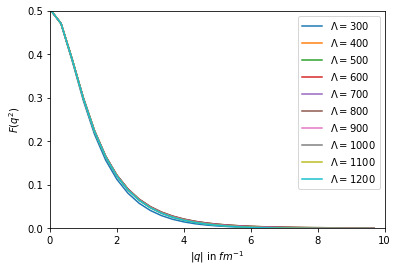

In [2]:
#Problem 6
q=[]
form=[]
pgrid=[]
wf=[]
weights=[]
numberpoints=30

for i in range(0,60):
    wf.append(0)
    weights.append(0)
    pgrid.append(0)

for m in range(3,13):
    filename="wf-obe-lam="+str(m)+"00.00.dat"
    filein=open(filename, "r")
    o=0
    for line in filein:
        data=line.split()
        wf[o]=float(data[2])
        weights[o]=float(data[1])
        pgrid[o]=float(data[0])
        o=o+1
        
    for n in range(numberpoints):
        q.append(n/3)
        form.append(formfaktor(q[n],0,0,wf,pgrid,weights))
    filein.close()
#If you believe in the beauty of programming then you should stop looking after this point. We are the group who changed to
#python and we are not familiar with it. So we did not know how to do it faster(also time was short)
qin=[]
form1=[]
form2=[]
form3=[]
form4=[]
form5=[]
form6=[]
form7=[]
form8=[]
form9=[]
form10=[]
for i in range(numberpoints):
    qin.append(q[i])
    form1.append(form[i+0*numberpoints])
    form2.append(form[i+1*numberpoints])
    form3.append(form[i+2*numberpoints])
    form4.append(form[i+3*numberpoints])
    form5.append(form[i+4*numberpoints])
    form6.append(form[i+5*numberpoints])
    form7.append(form[i+6*numberpoints])
    form8.append(form[i+7*numberpoints])
    form9.append(form[i+8*numberpoints])
    form10.append(form[i+9*numberpoints])

    
plt.xlim(0,10)
plt.ylim(0,0.5)
plt.plot(qin,form1, label=r"$\Lambda=300$")
plt.plot(qin,form2, label=r"$\Lambda=400$")
plt.plot(qin,form3, label=r"$\Lambda=500$")
plt.plot(qin,form4, label=r"$\Lambda=600$")
plt.plot(qin,form5, label=r"$\Lambda=700$")
plt.plot(qin,form6, label=r"$\Lambda=800$")
plt.plot(qin,form7, label=r"$\Lambda=900$")
plt.plot(qin,form8, label=r"$\Lambda=1000$")
plt.plot(qin,form9, label=r"$\Lambda=1100$")
plt.plot(qin,form10, label=r"$\Lambda=1200$")

plt.xlabel(r'$|q|$ in $fm^{-1}$')
plt.ylabel(r'$F(q^2)$')
plt.legend()
plt.savefig('problem6.png')

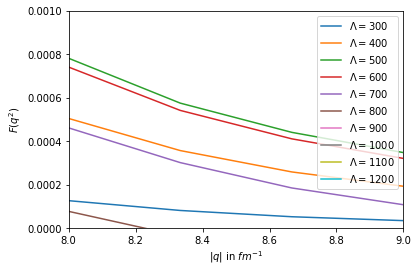

In [3]:
plt.xlim(8,9)
plt.ylim(0,0.001)
plt.plot(qin,form1, label=r"$\Lambda=300$")
plt.plot(qin,form2, label=r"$\Lambda=400$")
plt.plot(qin,form3, label=r"$\Lambda=500$")
plt.plot(qin,form4, label=r"$\Lambda=600$")
plt.plot(qin,form5, label=r"$\Lambda=700$")
plt.plot(qin,form6, label=r"$\Lambda=800$")
plt.plot(qin,form7, label=r"$\Lambda=900$")
plt.plot(qin,form8, label=r"$\Lambda=1000$")
plt.plot(qin,form9, label=r"$\Lambda=1100$")
plt.plot(qin,form10, label=r"$\Lambda=1200$")

plt.xlabel(r'$|q|$ in $fm^{-1}$')
plt.ylabel(r'$F(q^2)$')
plt.legend()
plt.savefig('problem6_2.png')